# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
replace_with_topic

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* 
* 
* 


* DELETE: Short list of expected outcomes
* DELETE: Use active verbs: Create, Change, Manipulate, Explore, etc.
* DELETE: Keep outcomes measurable, where possible: Success means the thing was created OR the object was changed 

# Overview: Model X
---

A risk in machine learning is using a model that doesn't match the data well enough (**underfitting**) OR matches the data so well, that it doesn't apply well to test data, it only applies to the training data (**overfitting**).

For this example, we will look at three graphs. This example comes from the Scikit Learn [Underfitting/Overfitting documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

## Prep the data

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Prep the test data

In the example, they create a function (`true_fun`) that generates a series of points on a graph in the shape of a Cosine.

In [19]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

With 30 random values as `X` inputs, they use the function to generate 30 related `y` values.

In [20]:
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Let's look at X and y.

In [21]:
X[:5]

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329])

In [22]:
y[:5]

array([1.0819082 , 0.87027612, 1.14386208, 0.70322051, 0.78494746])

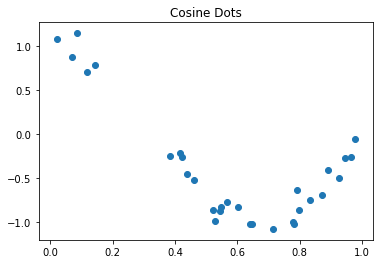

In [23]:
plt.scatter(X, y)
plt.title("Cosine Dots");

### Prep the test data

In [24]:
X_test = np.linspace(0.05, 1, 100)

## Choose Appropriate Hyperparameters

To model the results, the example sets up something called a Pipeline. Pipelines allow you to feed inputs into one "end" of a series of models and get predictions out the other end, without having to manually take the output of one model and drop into the inputs of the next model.

This example uses the PolynomialFeatures model to transform inputs from a degree 1 polynomial into higher degree polynomials. It takes the results of those transformations and then feeds them into the LinearRegression model. 

The Pipeline simplifies things so that we only have to call `.fit()` once on the pipeline.

We will do this three times using degrees of 1, 4, and 15 to demonstrate underfitting, a good fit, and overfitting.

We will dive a little deeper into the PipeLine and the PolynomialFeatures components later.

Two of these cases will generate linear regressions that are not straight lines.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Let's start with **degree of 1**

In [26]:
polynomial_features = PolynomialFeatures(degree=1,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

## Fit the Model

We only have to call `.fit()` on the pipeline, not on each of the components in the pipeline.

In [27]:
pipeline.fit(X[:, np.newaxis], y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

## Apply the Model

In [28]:
y_test = pipeline.predict(X_test[:, np.newaxis])

## Examine the results

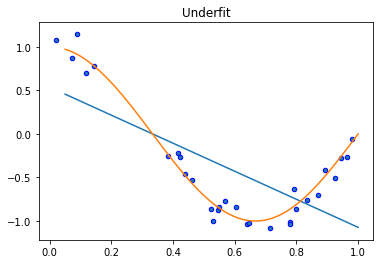

In [29]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.title("Underfit")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples");    

## Choose Appropriate Hyperparameters

Repeating the process to generate polynomial features of **degree 4**:

In [30]:
polynomial_features = PolynomialFeatures(degree=4,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

## Fit the Model

In [31]:
pipeline.fit(X[:, np.newaxis], y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

## Apply the Model

In [32]:
y_test = pipeline.predict(X_test[:, np.newaxis])

## Examine the results

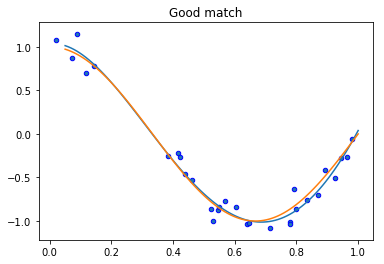

In [33]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.title("Good match")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples");    

## Choose Appropriate Hyperparameters

Lastly, let's generate polynomial features of **degree 15**:

In [34]:
polynomial_features = PolynomialFeatures(degree=15,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

## Fit the Model

In [35]:
pipeline.fit(X[:, np.newaxis], y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=15, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

## Apply the Model

In [36]:
y_test = pipeline.predict(X_test[:, np.newaxis])

## Examine the results

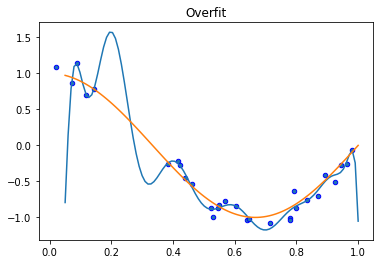

In [37]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.title("Overfit")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples");    

## Prep the data

We start with a set of standard imports...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.xx import XX

### Prep the training data and test data

In [ ]:
df = pd.read_csv('../universal_datasets/skincancer.txt',
                 names=[])
df.head()

In [ ]:
df.shape

In [ ]:
X = df[].to_frame()
y = df[]

In [ ]:
X[:5]

In [ ]:
y[:5]

With our data imported, let's separate it into training data and test data.

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
plt.scatter(X_train, y_train)
plt.title("")
plt.xlabel("")
plt.ylabel("");

## Choose the Model

## Choose Appropriate Hyperparameters

Here we choose to assign xx hyperparameters: `xx` and `xx`. We will discuss both later.

There are a number of hyperparameters

```python
XX()
```

## Fit the Model

In [ ]:
model.fit(X_train, y_train)

## Apply the Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
y_pred[::100]

## Examine the results

# Gotchas
---

# Deep Dive
---

Let's explore PolynomialFeatures and Pipelines in a bit more depth:

## PolynomialFeature

The PolynomialFeature class has a `.fit_transform()` method that transforms input values into a series of output values ready, often to be used as inputs in other models.

In [38]:
X = np.arange(3).reshape(3, 1)
X

array([[0],
       [1],
       [2]])

In [39]:
poly = PolynomialFeatures(1)
poly.fit_transform(X)

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

Yields $1, a$ for each element in the X matrix

In [40]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.]])

Yields $1, a, a^2$ for each element in the X matrix

In [41]:
poly = PolynomialFeatures(4)
poly.fit_transform(X)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16.]])

Yields $1, a, a^2, a^3, a^4$ for each element in the X matrix

In [42]:
X2 = np.arange(6).reshape(3, 2)
X2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [43]:
poly = PolynomialFeatures(1)
poly.fit_transform(X2)

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.]])

Yields $1, a, b$ for each element in the X matrix

In [44]:
poly = PolynomialFeatures(2)
poly.fit_transform(X2)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Yields $1, a, b, a^2, ab, b^2$ for each element in the X matrix

In [45]:
poly = PolynomialFeatures(3)
poly.fit_transform(X2)

#         1     a     b     a^2   ab   b^2   a^3  a^2*b a*b^2 b^3

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

Yields $1, a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3$ for each element in the X matrix

Thus for any degree that we feed into the PolynomialFeature model, we can transform an input matrix into a higher order matrix that will allow for more precise calculations of `y` values, given values of `x`.

## Pipeline

The Pipeline class accepts any number of models as input and creates a sequence of steps.

All models except the last must have some form of `*transform()` method that will output an appropriate matrix to feed into the next model in the pipeline.

Once a pipeline is created, the user only needs to call the `.fit()` and `predict()` methods once on the pipeline.



To create a Pipeline, we first instantiate any of the models we want to use, just as if we were creating standalone models.

> ```python
polynomial_features = PolynomialFeatures(degree=15,
                                         include_bias=False)
linear_regression = LinearRegression()
```

Next we provide a `list` of `tuples` to the Pipeline class, where each tuple contains a key, value pair where the key is a name we want to call the step of the pipeline and the value is the model we want to use at that step:

> ```python
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
```

With a Pipeline in hand, we simply call `.fit()` just as we would for any model.

> ```python
pipeline.fit(X[:, np.newaxis], y)
```

Jupyter will output the Pipeline parameters for us and we can see each of the steps we defined in the correct order and we can see that each step includes the hyperparameters that we provided.

> ```python
Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=15,
             include_bias=False, interaction_only=False)), 
            ('linear_regression', LinearRegression(copy_X=True,
             fit_intercept=True, n_jobs=None,
             normalize=False))])
```

# Gotchas
---

# How to learn more: tips and hints
---

# Experience Points!
---

# delete_this_line: task 01

In **`jupyter`** create a simple script to complete the following tasks:


**REPLACE THE FOLLOWING**

Create a function called `me()` that prints out 3 things:

* Your name
* Your favorite food
* Your favorite color

Lastly, call the function, so that it executes when the script is run

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: task 02

In **`jupyter`** create a simple script to complete the following tasks:

**REPLACE THE FOLLOWING**

Task | Sample Object(s)
:---|:---
Compare two items using `and` | 'Bruce', 0
Compare two items using `or` | '', 42
Use the `not` operator to make an object False | 'Selina' 
Compare two numbers using comparison operators | `>, <, >=, !=, ==`
Create a more complex/nested comparison using parenthesis and Boolean operators| `('kara' _ 'clark') _ (0 _ 0.0)`

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: sample 03

In your **text editor** create a simple script called:

```bash
my_lessonname_03.py```

Execute your script on the command line using **`ipython`** via this command:

```bash
ipython -i my_lessonname_03.py```

**REPLACE THE FOLLOWING**

I suggest that as you add each feature to your script that you run it right away to test it incrementally. 

1. Create a variable with your first name as a string AND save it with the label: `myfname`.
1. Create a variable with your age as an integer AND save it with the label: `myage`.

1. Use `input()` to prompt for your first name AND save it with the label: `fname`.
1. Create an `if` statement to test whether `fname` is equivalent to `myfname`. 
1. In the `if` code block: 
   1. Use `input()` prompt for your age AND save it with the label: `age` 
   1. NOTE: don't forget to convert the value to an integer.
   1. Create a nested `if` statement to test whether `myage` and `age` are equivalent.
1. If both tests pass, have the script print: `Your identity has been verified`

When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[General API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[XX API Reference]()||
|[User Guide]()||